In [1]:
import pandas as pd
import pickle
import matplotlib.pyplot as pl
import numpy as np

In [2]:
tableDict = pickle.load(open('TableDict.p','rb'))

In [3]:
pn = pd.Panel(tableDict)

In [4]:
pn

<class 'pandas.core.panel.Panel'>
Dimensions: 5 (items) x 4 (major_axis) x 12 (minor_axis)
Items axis: ID1 to SDT
Major_axis axis: 95th%ile to median
Minor_axis axis: rho_412_abs to rho_670_perc

In [5]:
pn.to_excel('MCTable.xlsx')

In [8]:
pn['ID1(BSL)']

,rrs_412_abs,rrs_412_perc,rrs_443_abs,rrs_443_perc,rrs_490_abs,rrs_490_perc,rrs_510_abs,rrs_510_perc,rrs_555_abs,rrs_555_perc,rrs_670_abs,rrs_670_perc
95th%ile,0.000767,7.27882,0.000645,5.447267,0.000503,4.260751,0.000456,5.206401,0.000358,8.083212,0.000171,47.919445
mean,0.000469,2.97411,0.000397,2.261305,0.000324,2.128420,0.000299,3.034474,0.000240,4.657456,0.000110,23.403687
median,0.000440,1.68641,0.000371,1.697259,0.000305,1.823251,0.000283,2.762755,0.000226,4.393632,0.000102,15.369572


In [8]:
pn2=pn.swapaxes('items','major_axis')

In [9]:
pn2

<class 'pandas.core.panel.Panel'>
Dimensions: 4 (items) x 5 (major_axis) x 12 (minor_axis)
Items axis: 95th%ile to median
Major_axis axis: ID1 to SDT
Minor_axis axis: rrs_412_abs to rrs_670_perc

In [10]:
pn3=pn2.swapaxes('major_axis','minor_axis')

In [11]:
pn3['95th%ile']

,ID1,ID2,ID8,ID9,SDT
rrs_412_abs,0.000767,0.001030,0.000715,0.000674,0.000942
rrs_412_perc,7.278820,9.882142,6.761170,6.375811,8.914876
rrs_443_abs,0.000645,0.000867,0.000600,0.000567,0.000779
rrs_443_perc,5.447267,7.366260,5.068147,4.784070,6.534168
rrs_490_abs,0.000503,0.000677,0.000467,0.000440,0.000591
rrs_490_perc,4.260751,5.763061,3.961902,3.742543,5.012159
rrs_510_abs,0.000456,0.000616,0.000424,0.000402,0.000528
rrs_510_perc,5.206401,7.040834,4.844668,4.577086,6.041864
rrs_555_abs,0.000358,0.000487,0.000333,0.000314,0.000412
rrs_555_perc,8.083212,10.986766,7.511090,7.087397,9.241743


In [62]:
pn3.to_pickle('snrSUmmaryPanel.p')

In [12]:
pn3['99th%ile']

,ID1,ID2,ID8,ID9,SDT
rrs_412_abs,0.000980,0.001269,0.000924,0.000880,0.001181
rrs_412_perc,17.816240,24.393950,16.501982,15.540263,21.781202
rrs_443_abs,0.000823,0.001074,0.000773,0.000735,0.000977
rrs_443_perc,9.618662,13.076785,8.949214,8.436578,11.458423
rrs_490_abs,0.000638,0.000842,0.000597,0.000565,0.000741
rrs_490_perc,6.235562,8.432076,5.809870,5.495293,7.306611
rrs_510_abs,0.000578,0.000767,0.000540,0.000515,0.000666
rrs_510_perc,7.243731,9.772525,6.742407,6.384439,8.401699
rrs_555_abs,0.000459,0.000609,0.000427,0.000402,0.000520
rrs_555_perc,11.111207,15.044946,10.346187,9.767603,12.688762


In [6]:
# If starting over, begin here...
pn3 = pd.read_pickle('snrSUmmaryPanel.p')

In [7]:
pn3.head

<bound method Panel.head of <class 'pandas.core.panel.Panel'>
Dimensions: 3 (items) x 12 (major_axis) x 6 (minor_axis)
Items axis: 95th%ile to median
Major_axis axis: rrs_412_abs to rrs_670_perc
Minor_axis axis: ID1(BSL) to SDT>

In [8]:
print(pn3['95th%ile'].columns)
#print(pn3['99th%ile'].columns)

Index(['ID1(BSL)', 'ID1Winter', 'ID2', 'ID8', 'ID9', 'SDT'], dtype='object')


In [9]:
absUnc95 = np.empty((6,5))
#relUnc95 = np.empty((6,5))
#absUnc99 = np.empty((6,5))
#relUnc99 = np.empty((6,5))
i = 0
for col in pn3['95th%ile'].columns:
        if col=='ID1Winter':
            continue
        absUnc95[:,i] = pn3['95th%ile'][col][0::2]
        #relUnc95[:,i] = pn3['95th%ile'][col][1::2]
        #absUnc99[:,i] = pn3['99th%ile'][col][0::2]
        #relUnc99[:,i] = pn3['99th%ile'][col][1::2]
        i += 1

In [10]:
pn3['95th%ile']['ID2'][0::2]

rrs_412_abs    0.001030
rrs_443_abs    0.000867
rrs_490_abs    0.000677
rrs_510_abs    0.000616
rrs_555_abs    0.000487
rrs_670_abs    0.000236
Name: ID2, dtype: float64

In [11]:
labels=['ID1','ID2','ID8','ID9','SDT']
lamb=[412,443,490,510,555,670]
absThresh = [0.001]*5 + [0.002]
absMarg = np.array(absThresh) *.8
cols=['b','r','m','c','orange']
relThresh = [5]* 5 + [10]
relMarg = np.array(relThresh) *.8
drange = np.arange(len(labels))

In [12]:
% matplotlib inline

In [13]:
import numpy as np
scl=8e-5/0.002

In [87]:
from matplotlib.pylab import rcParams
rcParams['xtick.labelsize'] = 14
rcParams['ytick.labelsize'] = 14

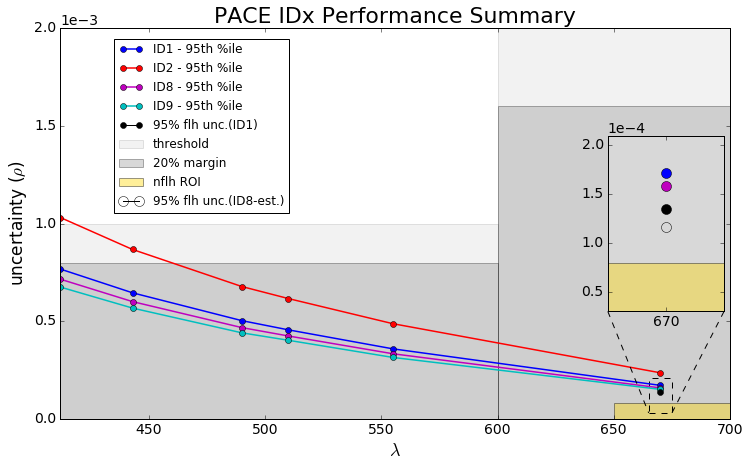

In [135]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
savedir='/disk02/UNCERTAINTIES/Monte-Carlo/PACE_SNR/DATA/L2_L3/FullScale/GLOBALS/S2003193196/PACEREVIEW_160331/May12_2016/'
f,ax=pl.subplots(figsize=(12,7))
axYmax = 0.002
axInYmax = 2.1e-4
axInYmin = 3e-5
ax.set_ylim(0,axYmax)
gboxY = 8e-5 / axYmax
gboxY2 = (8e-5 -axInYmin)/ (axInYmax-axInYmin)
nflhFromID1 = 9.5400785e-05*np.sqrt(2)
nflhFromID8 = nflhFromID1 - 1.85e-5
ax.set_xlim(412,700)
ax.set_title('PACE IDx Performance Summary',fontsize=22)
ax.set_ylabel(r'uncertainty ($\rho$)',fontsize=17)
ax.set_xlabel(r'$\lambda$',fontsize=18)
ax.axvspan(412,600,ymin=0,ymax=.5,facecolor='gray',alpha=0.1)
ax.axvspan(412,600,ymax=.4,facecolor='gray',alpha=0.3)
ax.axvspan(600,700,ymax=1,facecolor='gray',alpha=0.1,label='threshold')
ax.axvspan(600,700,ymax=.8,facecolor='gray',alpha=0.3,label='20% margin')
ax.axvspan(650,700,ymax=gboxY,facecolor='gold',alpha=0.4,label='nflh ROI')

#ax.plot(670,9.5400785e-05/4,color='k',marker='s',label='95% ID1-NoNIR, 4-km')
axins = zoomed_inset_axes(ax,5,loc=5)
for l,d,c in zip(labels,drange,cols):
    if l=='SDT':
        continue
    lab = l + ' - 95th %ile'
    ax.plot(lamb,absUnc95[:,d],label=lab,marker='o',color=c,lw=1.5)
ax.plot(670,nflhFromID1,color='k',marker='o',label='95% flh unc.(ID1)')
#ax.plot(670,nflhFromID8,color='k',marker='o',markerfacecolor='none')
ax.ticklabel_format(style='sci',axis='y',scilimits=(-2,3))
for l,d,c in zip(labels,drange,cols):
    if l=='SDT' or l=='ID9' or l=='ID2':
        continue
    axins.plot(670,absUnc95[-1,d],marker='o',color=c,markersize=10)
axins.plot(670,nflhFromID1,color='k',marker='o',markersize=10)
axins.plot(670,nflhFromID8,color='k',marker='o',markersize=10,
           markerfacecolor='none',label='95% flh unc.(ID8-est.)')
legH,legL = ax.get_legend_handles_labels()
legH0,legL0 = axins.get_legend_handles_labels()
legLF = legL + legL0
legHF = legH + legH0
leg=ax.legend(legHF,legLF,loc='center right',bbox_to_anchor=(0.35,0.75));
axins.axvspan(600,700,ymax=1,facecolor='gray',alpha=0.3)
axins.axvspan(650,700,ymax=gboxY2,facecolor='gold',alpha=0.4)
#axins.axvspan(412,600,ymin=0,ymax=.5,facecolor='gray',alpha=0.1)
#axins.axvspan(412,600,ymax=.4,facecolor='gray',alpha=0.3)
#axins.axvspan(600,700,ymax=1,facecolor='gray',alpha=0.1,label='threshold')
#axins.axvspan(600,700,ymax=.8,facecolor='gray',alpha=0.3,label='20% margin')
#axins.axvspan(650,700,ymax=scl,facecolor='gold',alpha=0.4,label='nflh ROI')
#axins.axhline(y=9.5400785e-05,xmin=0.83,xmax=1,color='k',ls='--',lw=2)
axins.set_xlim(665,675)
axins.set_xticks([670])
axins.set_ylim(axInYmin,axInYmax)
axins.ticklabel_format(style='sci',axis='y',scilimits=(-2,3))
mark_inset(ax,axins,loc1=3,loc2=4,fc="none",ec='k',ls='--',lw=1);
f.savefig(savedir+'summarystatsZoom.png',dpi=300)

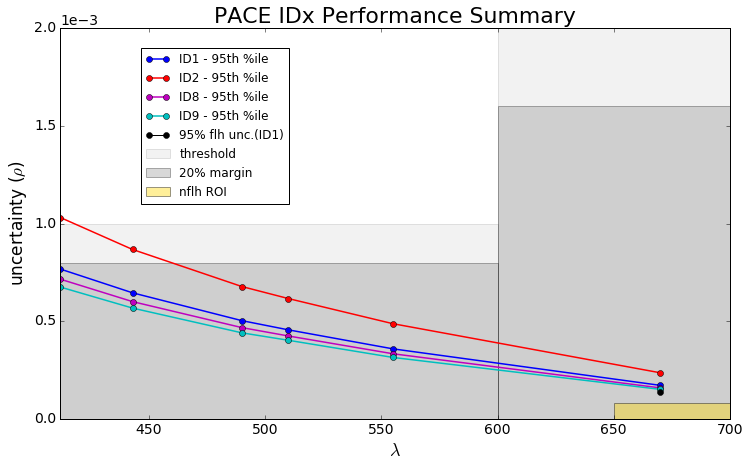

In [125]:
#No zooming inset
f,ax=pl.subplots(figsize=(12,7))
axYmax = 0.002
axInYmax = 2.1e-4
ax.set_ylim(0,axYmax)
gboxY = 8e-5 / axYmax
gboxY2 = 8e-5 / axInYmax
nflhFromID1 = 9.5400785e-05*np.sqrt(2)
nflhFromID8 = nflhFromID1 - 1.85e-5
ax.set_xlim(412,700)
ax.set_title('PACE IDx Performance Summary',fontsize=22)
ax.set_ylabel(r'uncertainty ($\rho$)',fontsize=17)
ax.set_xlabel(r'$\lambda$',fontsize=18)
ax.axvspan(412,600,ymin=0,ymax=.5,facecolor='gray',alpha=0.1)
ax.axvspan(412,600,ymax=.4,facecolor='gray',alpha=0.3)
ax.axvspan(600,700,ymax=1,facecolor='gray',alpha=0.1,label='threshold')
ax.axvspan(600,700,ymax=.8,facecolor='gray',alpha=0.3,label='20% margin')
ax.axvspan(650,700,ymax=gboxY,facecolor='gold',alpha=0.4,label='nflh ROI')
for l,d,c in zip(labels,drange,cols):
    if l=='SDT':
        continue
    lab = l + ' - 95th %ile'
    ax.plot(lamb,absUnc95[:,d],label=lab,marker='o',color=c,lw=1.5)
ax.plot(670,nflhFromID1,color='k',marker='o',label='95% flh unc.(ID1)')
#ax.plot(670,nflhFromID8,color='k',marker='o',markerfacecolor='none')
ax.ticklabel_format(style='sci',axis='y',scilimits=(-2,3))

ax.legend(loc='center right',bbox_to_anchor=(0.35,0.75));

f.savefig(savedir+'summarystats.png',dpi=300)

In [112]:
legLF = legL + legL0
legHF = legH + legH0

['ID1 - 95th %ile', 'ID2 - 95th %ile', 'ID8 - 95th %ile', 'ID9 - 95th %ile', '95% flh unc.(ID1)', 'threshold', '20% margin', 'nflh ROI', '95% flh unc.(ID8-est.)']


In [69]:
(1.7122e-4-1.5816e-4)*np.sqrt(2)

1.8469629124592644e-05

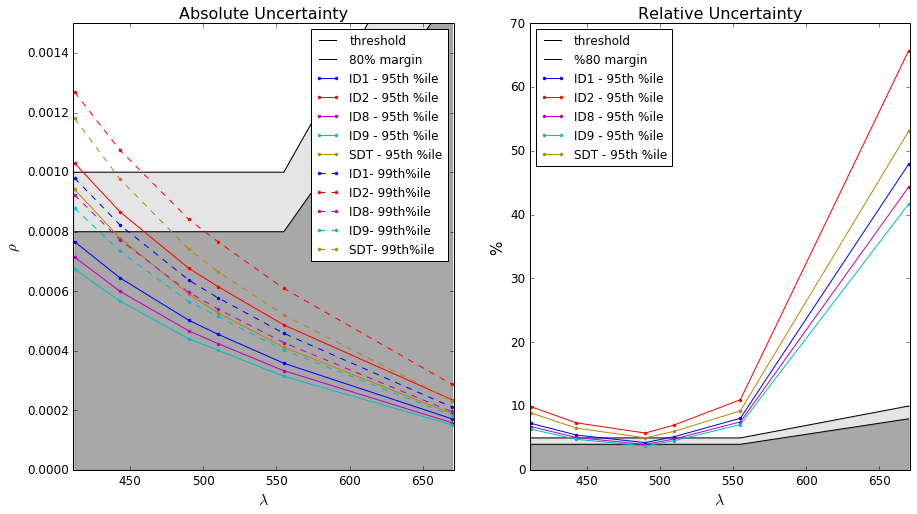

In [34]:
f,ax = pl.subplots(figsize=(15,8))
ax[0].plot(lamb,absThresh,'k',label='threshold')
ax[0].plot(lamb,absMarg,'k',label='80% margin')
ax[0].fill_between(lamb,absThresh,color='gray',alpha=0.2)
ax[0].fill_between(lamb,absMarg,color='gray',alpha=0.6)
ax[1].plot(lamb,relThresh,'k',label='threshold')
ax[1].plot(lamb,relMarg,'k',label='%80 margin')
ax[1].fill_between(lamb,relThresh,color='gray',alpha=0.2)
ax[1].fill_between(lamb,relMarg,color='gray',alpha=0.6)

for l,d,c in zip(labels,drange,cols):
    lab = l + ' - 95th %ile'
    ax[0].plot(lamb,absUnc95[:,d],label=lab,marker='.',color=c)
    ax[1].plot(lamb,relUnc95[:,d],label=lab,marker='.',color=c)
for l,d,c in zip(labels,drange,cols):
    lab = l + '- 99th%ile'
    ax[0].plot(lamb,absUnc99[:,d],label=lab,marker='.',ls='--',color=c)
ax[0].set_xlabel(r'$\lambda$',fontsize=16)
ax[0].set_xlim(xmin=411,xmax=671)
ax[1].set_xlim(xmin=411,xmax=671)
ax[0].set_title('Absolute Uncertainty',fontsize=16)
ax[0].set_ylabel(r'$\rho$',fontsize=15)
ax[1].set_title('Relative Uncertainty',fontsize=16)
ax[1].set_ylabel('%',fontsize=15)
ax[1].set_xlabel(r'$\lambda$',fontsize=16)
ax[0].legend(loc='best')
ax[1].legend(loc='best')
ax[0].set_ylim(ymax=0.0015)
f.savefig('stats95.png')